<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/ibm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### *IBM with Qiskit*

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit[visualization] -q

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import userdata
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [ ]:
## 1. Connect to IBM Quantum
api_token = userdata.get('ibm-quantum')

# Pass both the token and the channel
service = QiskitRuntimeService(channel='ibm_quantum_platform', token=api_token)

backend = service.least_busy(simulator=False, operational=True)
print(f"Selected backend: {backend.name}")

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-24 14:58:30,762: Default instance not set. Searching all available instances.


Selected backend: ibm_brussels



Ideal Circuit Diagram:


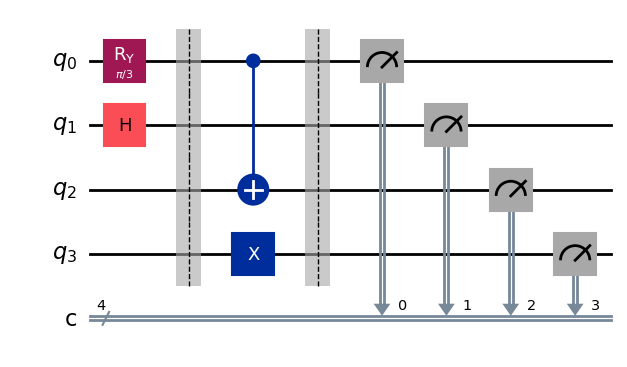

In [ ]:
# 2. Create the Quantum Circuit with Asymmetric State Evolution (with Unequal Superposition)
qc = QuantumCircuit(4, 4)
qc.ry(np.pi / 3, 0) # Replace H(0) with Ry(pi/3, 0) to create a 75%/25% split
qc.h(1)             # Keep the H on q1 for a 50/50 split
qc.barrier()
qc.cx(0, 2)
qc.x(3)
qc.barrier()
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
print("\nIdeal Circuit Diagram:")
display(qc.draw("mpl"))


Transpiled Circuit for ibm_brussels:


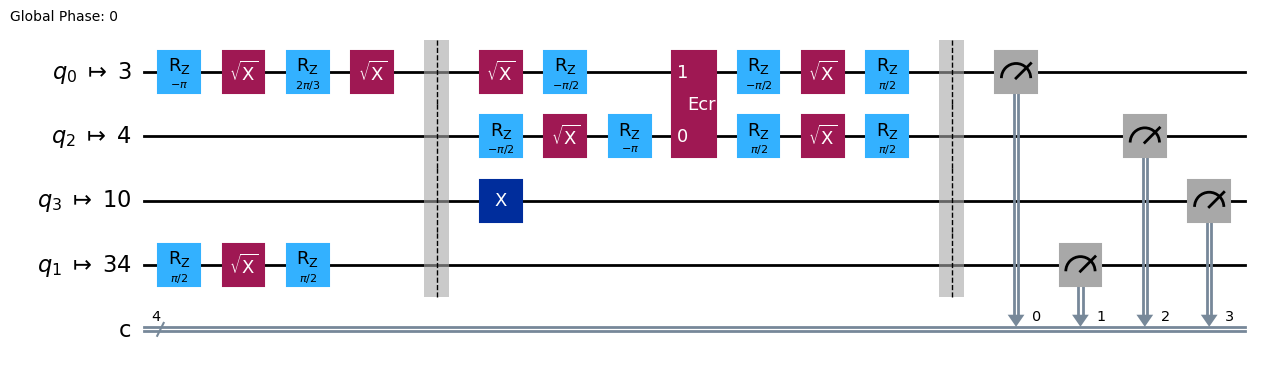

In [ ]:
# 3. Transpile circuit for backend (translates ideal circuit into one the hardware can run)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
print(f"\nTranspiled Circuit for {backend.name}:")
display(isa_circuit.draw("mpl"))

In [ ]:
# 4. Run job on IBM quantum computer
sampler = Sampler(mode=backend)
shots = 1024
print(f"\nSubmitting job to {backend.name}...")
job = sampler.run(pubs=[(isa_circuit,)], shots=shots) # Run transpiled 'isa_circuit', not original 'qc'
print(f"Job submitted successfully! Job ID: {job.job_id()}")


Submitting job to ibm_brussels...
Job submitted successfully! Job ID: d3615tl7ibtc73dlifgg


In [ ]:
job.status()

'DONE'

In [ ]:
job.metrics()

{'timestamps': {'created': '2025-09-18T14:11:02.899474Z',
  'finished': '2025-09-18T14:15:53.524337Z',
  'running': '2025-09-18T14:15:36.902052Z'},
 'bss': {'seconds': 3},
 'usage': {'quantum_seconds': 3, 'seconds': 3},
 'qiskit_version': 'qiskit_ibm_runtime-0.41.1,qiskit-2.1.2*',
 'caller': 'qiskit_ibm_runtime~sampler.py'}

In [ ]:
job.result()

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-18 14:15:51', stop='2025-09-18 14:15:53', size=1024>)])}, 'version': 2})


Measurement Results (Counts):
{'1000': 390, '1010': 350, '1101': 121, '1110': 4, '1111': 141, '0010': 4, '0111': 2, '1001': 1, '1100': 5, '1011': 2, '0101': 1, '0000': 3}

Result Histogram:


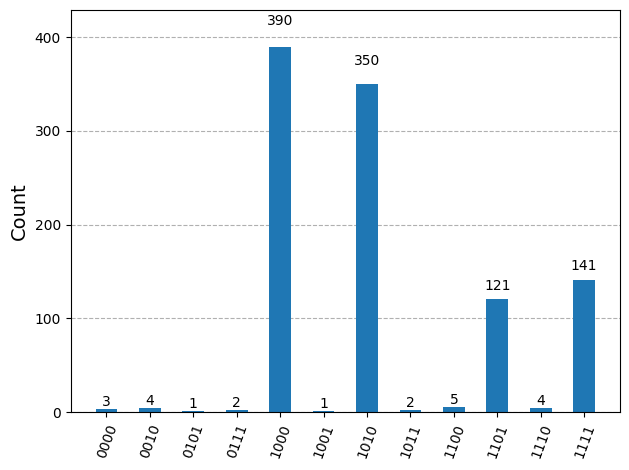

In [ ]:
# 5. Get and display results
result = job.result()
counts = result[0].data.c.get_counts()
print("\nMeasurement Results (Counts):")
print(counts)
plot_histogram(counts)


Local Simulation results (counts) with 1024 shots:
{'1101': 118, '1111': 131, '1000': 388, '1010': 387}

Local Simulation Probabilities:
  |1000>: 0.379 (388/1024)
  |1010>: 0.378 (387/1024)
  |1101>: 0.115 (118/1024)
  |1111>: 0.128 (131/1024)

Local Simulation Histogram:


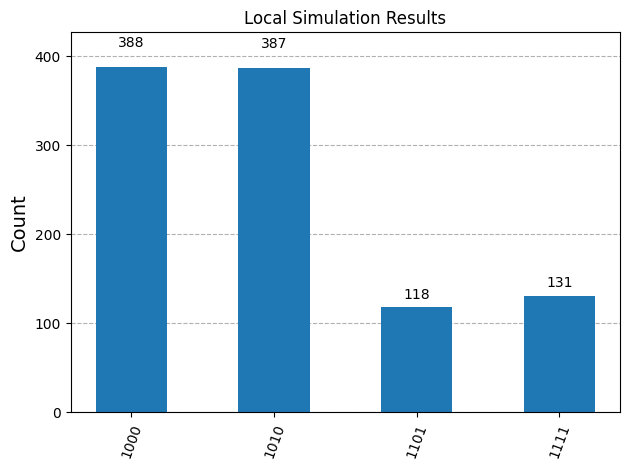

In [ ]:
# Appendix: Run local simulation
from qiskit.primitives import StatevectorSampler as LocalSampler
from qiskit.visualization import plot_histogram

local_sampler = LocalSampler() # Create local sampler
local_shots = 1024
local_job = local_sampler.run(pubs=[(qc,)], shots=local_shots) # Run circuit
local_result = local_job.result()
local_counts = local_result[0].data.c.get_counts() # Extract counts from result
print(f"\nLocal Simulation results (counts) with {local_shots} shots:")
print(local_counts)
print("\nProbabilities:")
for bitstring, count in sorted(local_counts.items()):
    probability = count / local_shots
    print(f"  |{bitstring}>: {probability:.3f} ({count}/{local_shots})")

display(plot_histogram(local_counts, title="Local Simulation Results"))

Devices: https://eu-de.quantum.cloud.ibm.com/computers

Topology: https://eu-de.quantum.cloud.ibm.com/docs/de/guides/qpu-information

Jobs: https://eu-de.quantum.cloud.ibm.com/workloads

Cost: https://cloud.ibm.com/billing

Tutorials: https://eu-de.quantum.cloud.ibm.com/docs/de/tutorials